# Tokenization

- Tokenization is a fundamental step in Natural Language Processing (NLP) that involves **breaking down a continuous sequence of text into smaller units** called tokens.

- These tokens typically represent words, subwords, or characters, depending on the tokenization approach.

- These tokens serve as the **building blocks for subsequent NLP tasks**, such as analysis, model training, and understanding the underlying meaning of the text.

- Without tokenization, processing raw text would be significantly more challenging for computational models

**Goal**:
  - To transform unstructured text into a structured format that can be easily processed and analyzed by algorithms.
  - This involves identifying the boundaries between linguistic units and creating a vocabulary of unique tokens found in the text corpus

# Need of Tokenization

1. **Simplifies Text Analysis**: By breaking text into smaller components, tokenization makes it easier to analyze and process.

2. **Facilitates Feature Extraction**: Tokens serve as features for machine learning models, enabling various NLP tasks such as text classification,
sentiment analysis, and named entity recognition.

3. **Standardizes Input**: Tokenization helps standardize the input text, making it more manageable for algorithms to process.

4. It transforms unstructured text into discrete units that can be processed

5. It enables counting, statistical analysis, and feature extraction

6. It prepares text for subsequent NLP tasks like part-of-speech tagging, named entity recognition, etc.

# Types of Tokenization

## Word Tokenization

- splitting text by spaces and punctuation

In [1]:
# Basic word tokenization - Splitting based on Space
text = "Hello, world! How are you doing today?"
tokens = text.split()
print(tokens)


['Hello,', 'world!', 'How', 'are', 'you', 'doing', 'today?']


In [14]:
# Using NLTK for better word tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
text = "Hello, world! How are you doing today?"
tokens = word_tokenize(text)
print(tokens)

['Hello', ',', 'world', '!', 'How', 'are', 'you', 'doing', 'today', '?']


## Subword Tokenization - Transformers/ AutoTokenizer

- Addresses the limitations of word tokenization by breaking words into smaller units.

- This is especially useful for **handling out-of-vocabulary words and morphologically rich languages**.

In [4]:
# Using Hugging Face's tokenizers library for BPE (Byte-Pair Encoding)
from transformers import AutoTokenizer

# Loading a pre-trained tokenizer (BERT)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Tokenization helps models understand text better."
tokens = tokenizer.tokenize(text)
print("Tokens:",tokens)

# Get token IDs (what's actually fed to models)
token_ids = tokenizer.encode(text)
print("Token IDs:",token_ids)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokens: ['token', '##ization', 'helps', 'models', 'understand', 'text', 'better', '.']
Token IDs: [101, 19204, 3989, 7126, 4275, 3305, 3793, 2488, 1012, 102]


- Token Id - 101 indicates starting of the sentence
- Token Id - 102 indicates ending of the sentence

## Character Tokenization

- Splitting text into individual characters

In [5]:
text = "Hello"
char_tokens = list(text)
print(char_tokens)  # ['H', 'e', 'l', 'l', 'o']

['H', 'e', 'l', 'l', 'o']


## Tokenization with spaCy

In [15]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

text = "Apple Inc. is worth $2 trillion! Amazing growth since the 1980s."
doc = nlp(text)

# Word tokenization
tokens = [token.text for token in doc]
print("Tokens:",tokens)

# With additional information
for token in doc:
    print(f"{token.text}\t{token.pos_}\t{token.is_stop}")

Tokens: ['Apple', 'Inc.', 'is', 'worth', '$', '2', 'trillion', '!', 'Amazing', 'growth', 'since', 'the', '1980s', '.']
Apple	PROPN	False
Inc.	PROPN	False
is	AUX	True
worth	ADJ	False
$	SYM	False
2	NUM	False
trillion	NUM	False
!	PUNCT	False
Amazing	ADJ	False
growth	NOUN	False
since	SCONJ	True
the	DET	True
1980s	NUM	False
.	PUNCT	False


- Generates Tokens, identifies POS and Stopwords

## Transformers

In [7]:
from transformers import AutoTokenizer

# Different models use different tokenization schemes
tokenizers = {
    "bert": AutoTokenizer.from_pretrained("bert-base-uncased"),
    "gpt2": AutoTokenizer.from_pretrained("gpt2"),
    "t5": AutoTokenizer.from_pretrained("t5-base")
}

text = "Transformers models use different tokenization approaches."

for name, tokenizer in tokenizers.items():
    tokens = tokenizer.tokenize(text)
    print(f"{name}: {tokens}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

bert: ['transformers', 'models', 'use', 'different', 'token', '##ization', 'approaches', '.']
gpt2: ['Transform', 'ers', 'Ġmodels', 'Ġuse', 'Ġdifferent', 'Ġtoken', 'ization', 'Ġapproaches', '.']
t5: ['▁Transformer', 's', '▁models', '▁use', '▁different', '▁token', 'ization', '▁approaches', '.']


## Handling Multiple Languages

In [8]:
# For multilingual text
from transformers import AutoTokenizer

multilingual_tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

text = "Hello world. Hola mundo. 你好世界。"
tokens = multilingual_tokenizer.tokenize(text)
print("Tokens:",tokens)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Tokens: ['▁Hello', '▁world', '.', '▁Hola', '▁mundo', '.', '▁', '你好', '世界', '。']


## Custom Tokenization

In [9]:
import re

def custom_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Split on whitespace
    tokens = text.split()
    return tokens

text = "Custom tokenization can be tailored to specific needs!"
tokens = custom_tokenize(text)
print(tokens)

['custom', 'tokenization', 'can', 'be', 'tailored', 'to', 'specific', 'needs']


## Token Embeddings

After tokenization, tokens are typically converted to numerical representations

In [19]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [22]:
import numpy as np

In [1]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [
    ["I", "love", "natural", "language", "processing"],
    ["Tokenization", "is", "an", "important", "step"],
    ["Machine", "learning", "models", "need", "numerical", "input"]
]

# Train a simple Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vector
vector = model.wv["Tokenization"]
print(f"Vector shape: {vector.shape}")  # Vector shape: (100,)

Vector shape: (100,)


In [2]:
vector

array([ 7.0887972e-03, -1.5679300e-03,  7.9474989e-03, -9.4886590e-03,
       -8.0294991e-03, -6.6403709e-03, -4.0034545e-03,  4.9892161e-03,
       -3.8135587e-03, -8.3199050e-03,  8.4117772e-03, -3.7470020e-03,
        8.6086961e-03, -4.8957514e-03,  3.9185942e-03,  4.9220170e-03,
        2.3926091e-03, -2.8188038e-03,  2.8491246e-03, -8.2562361e-03,
       -2.7655398e-03, -2.5911583e-03,  7.2490061e-03, -3.4634031e-03,
       -6.5997029e-03,  4.3404270e-03, -4.7448516e-04, -3.5975564e-03,
        6.8824720e-03,  3.8723124e-03, -3.9002013e-03,  7.7188847e-04,
        9.1435025e-03,  7.7546560e-03,  6.3618720e-03,  4.6673026e-03,
        2.3844899e-03, -1.8416261e-03, -6.3712932e-03, -3.0181051e-04,
       -1.5653884e-03, -5.7228567e-04, -6.2628710e-03,  7.4340473e-03,
       -6.5914928e-03, -7.2392775e-03, -2.7571463e-03, -1.5154004e-03,
       -7.6357173e-03,  6.9824100e-04, -5.3261113e-03, -1.2755442e-03,
       -7.3651113e-03,  1.9605684e-03,  3.2731986e-03, -2.3138524e-05,
      

In [4]:
model.wv.most_similar("natural")

[('learning', 0.2529048025608063),
 ('numerical', 0.13725271821022034),
 ('Machine', 0.04408960044384003),
 ('love', 0.02700837142765522),
 ('step', 0.01281161978840828),
 ('models', 0.006598459556698799),
 ('Tokenization', -0.0011978191323578358),
 ('important', -0.025461023673415184),
 ('input', -0.041252318769693375),
 ('language', -0.07639002799987793)]

In [5]:
model.wv.most_similar_to_given("natural", ["language", "processing","input"])

'input'

In [6]:
model.wv.most_similar_to_given("natural", ["language", "processing"])

'language'

In [8]:
vector1 = model.wv["natural"]  # Get the vector for "natural"
vectors_all = [model.wv[word] for word in ["language", "processing"]]  # Get vectors for other words

similarities = model.wv.cosine_similarities(vector1, vectors_all)
print(similarities)


[-0.07639003 -0.16288689]


## Contextual Tokenization

Modern NLP models use contextual tokenization, where the same word can have different embeddings depending on context

In [9]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [10]:

# Tokenize two sentences with the same word in different contexts
sentences = [
    "The bank of the river is muddy.",
    "I need to go to the bank to withdraw money."
]

In [12]:
# Process both sentences
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    #print(inputs)
    outputs = model(**inputs)
    #print(outputs)

    # Get the embeddings for the word "bank"
    bank_position = sentence.lower().split().index("bank")
    bank_embedding = outputs.last_hidden_state[0, bank_position+1]  # +1 for [CLS] token

    print(f"'bank' embedding norm in '{sentence}': {torch.norm(bank_embedding).item():.4f}")

'bank' embedding norm in 'The bank of the river is muddy.': 13.9071
'bank' embedding norm in 'I need to go to the bank to withdraw money.': 15.6895


## Byte-Pair Encoding (BPE)

BPE starts with characters and iteratively merges the most frequent pairs to form new subword tokens

In [18]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace


In [19]:
# Create a BPE tokenizer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

In [20]:
# Train it on a corpus
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
                    vocab_size=25000,
                    min_frequency=2)

In [29]:
# Sample training data
files = ["/content/Git commands.txt"]
tokenizer.train(files, trainer)


In [24]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


In [25]:
import PyPDF2

In [26]:
# Sample training data
file_path = "/content/MACHINE LEARNING(R17A0534).pdf"

# Extract text from PDF
text_data = ""
with open(file_path, 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text_data += page.extract_text()

# Now train with the extracted text
tokenizer.train_from_iterator([text_data], trainer) # train_from_iterator is used for in-memory strings
print("Training complete!")

# You can now save the tokenizer if needed
#tokenizer.save("my_tokenizer.json")

Training complete!


In [30]:
encoded = tokenizer.encode("unbefriendliness")
print(encoded.tokens)

['un', 'be', 'f', 'r', 'i', 'en', 'd', 'l', 'in', 'es', 's']


## WordPiece

Used by BERT, WordPiece is similar to BPE but uses a different selection criterion based on likelihood rather than just frequency

In [32]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example tokenization
text = "unbelievable preprocessing techniques"
tokens = tokenizer.tokenize(text)
print(tokens)

# suffixes get '##' prefix to indicate the continuations

['unbelievable', 'prep', '##ro', '##ces', '##sing', 'techniques']


## SentencePiece and Unigram Language Model

SentencePiece treats the text as a sequence of Unicode characters and can work directly on raw text without pre-tokenization

In [6]:
import sentencepiece as spm

# Train a SentencePiece model
# This file should contain the text you want to use for training your SentencePiece model.
# Each line in the file should represent a sentence or a piece of text.

spm.SentencePieceTrainer.train(
    '--input=corpus.txt --model_prefix=m --vocab_size=300 --character_coverage=0.9995'
)

# Load the model
sp = spm.SentencePieceProcessor()
sp.load('m.model')

# Tokenize text
text = "SentencePiece tokenizes sentences directly without pre-tokenization."
tokens = sp.encode_as_pieces(text)
print(tokens)  # ['▁Sentence', 'Piece', '▁tokenizes', '▁sentences', '▁directly', '▁without', '▁pre', '-', 'token', 'ization', '.']

# The '▁' character indicates the beginning of a word

['▁S', 'ent', 'ence', 'P', 'i', 'ec', 'e', '▁to', 'ke', 'n', 'i', 'z', 'es', '▁', 's', 'ent', 'ence', 's', '▁di', 're', 'c', 't', 'l', 'y', '▁wi', 'th', 'o', 'ut', '▁p', 're', '-', 'to', 'ke', 'n', 'i', 'z', 'ation', '.']


## Building a Custom Subword Tokenizer

In [7]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

# Initialize tokenizer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Define special tokens
trainer = BpeTrainer(
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
    vocab_size=10000
)

# Prepare training corpus
def batch_iterator(batch_size=1000):
    with open("corpus.txt", "r", encoding="utf-8") as f:
        for line in f:
            yield line.strip()

# Train the tokenizer
tokenizer.train_from_iterator(batch_iterator(), trainer=trainer)

# Save the tokenizer
tokenizer.save("custom-tokenizer.json")

# Load and use
loaded_tokenizer = Tokenizer.from_file("custom-tokenizer.json")
encoded = loaded_tokenizer.encode("This is a test sentence with rare words like hyperboloid.")
print(encoded.tokens)

['This', 'is', 'a', 't', 'es', 't', 's', 'ent', 'en', 'ce', 'with', 'ra', 're', 'w', 'or', 'd', 's', 'like', 'h', 'y', 'per', 'b', 'ol', 'o', 'id', '.']


## BERT

BERT uses WordPiece tokenization with a vocabulary size of ~30K tokens:

In [1]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "Pretrained representations have revolutionized NLP."

# Get tokens with their IDs
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

for token, id in zip(tokens, token_ids):
    print(f"{token:<15} {id}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

pre             3653
##train         23654
##ed            2098
representations 15066
have            2031
revolution      4329
##ized          3550
nl              17953
##p             2361
.               1012


## GPT Models

GPT-2 and GPT-3 use a variant of BPE called "Byte-level BPE" that works on bytes rather than characters

In [14]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
text = "Transfer learning with large pretrained models."

tokens = tokenizer.tokenize(text)
print(tokens)
# Note the 'Ġ' character indicating a space before the token

['Transfer', 'Ġlearning', 'Ġwith', 'Ġlarge', 'Ġpret', 'rained', 'Ġmodels', '.']


# Sample Code

In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

class TextPreprocessor:
    def __init__(self, language='english'):
        self.stop_words = set(stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Basic text cleaning"""
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        return text

    def tokenize(self, text):
        """Tokenize text using NLTK"""
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        """Remove stopwords from tokens"""
        return [token for token in tokens if token not in self.stop_words]

    def lemmatize(self, tokens):
        """Lemmatize tokens"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]

    def process(self, text):
        """Apply full preprocessing pipeline"""
        text = self.clean_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.lemmatize(tokens)
        return ' '.join(tokens)

# Example usage with a text classification task
def main():
    # Sample data - in real scenarios, you'd load this from a file
    data = [
        {'text': 'I love this product! It works amazingly well.', 'label': 'positive'},
        {'text': 'This is the worst purchase I have ever made.', 'label': 'negative'},
        {'text': 'The customer service was excellent and helpful.', 'label': 'positive'},
        {'text': 'I would not recommend this to anyone.', 'label': 'negative'},
        {'text': 'Average product, nothing special about it.', 'label': 'neutral'},
        {'text': 'Decent quality for the price, I guess.', 'label': 'neutral'},
        {'text': 'Absolutely fantastic experience with this company!', 'label': 'positive'},
        {'text': 'Terrible service, will never buy again.', 'label': 'negative'},
        {'text': "It's okay, but I've seen better options.", 'label': 'neutral'},
        {'text': 'Best purchase decision ever, totally recommend!', 'label': 'positive'}
    ]

    df = pd.DataFrame(data)

    # Preprocess the text
    preprocessor = TextPreprocessor()
    df['processed_text'] = df['text'].apply(preprocessor.process)

    # Split into features and target
    X = df['processed_text']
    y = df['label']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train a simple classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_vec)

    # Evaluate the model
    print(classification_report(y_test, y_pred))

    # Example of tokenizing new text
    new_text = "I just received my order and I'm quite satisfied with it."
    print("\nNew text:", new_text)

    # Process and tokenize
    processed = preprocessor.process(new_text)
    print("After preprocessing:", processed)

    # Convert to vector and predict
    new_vec = vectorizer.transform([processed])
    prediction = classifier.predict(new_vec)
    print("Sentiment prediction:", prediction[0])

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


New text: I just received my order and I'm quite satisfied with it.
After preprocessing: received order im quite satisfied
Sentiment prediction: positive


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# Visualizing Subword Tokenization

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]


Example 1: Antidisestablishmentarianism is a long word.
BERT    : 13 tokens - anti | Ġdis | Ġest | Ġab | Ġlish | Ġment | Ġarian | Ġism | is | a | long | word | .
GPT-2   : 10 tokens - Ant | idis | establishment | arian | ism | Ġis | Ġa | Ġlong | Ġword | .
RoBERTa : 10 tokens - Ant | idis | establishment | arian | ism | Ġis | Ġa | Ġlong | Ġword | .
T5      : 15 tokens - ▁Anti | d | is | est | abl | ish | ment | aria | nism | ▁is | ▁ | a | ▁long | ▁word | .
ALBERT  : 10 tokens - ▁anti | dis | establishment | arian | ism | ▁is | ▁a | ▁long | ▁word | .


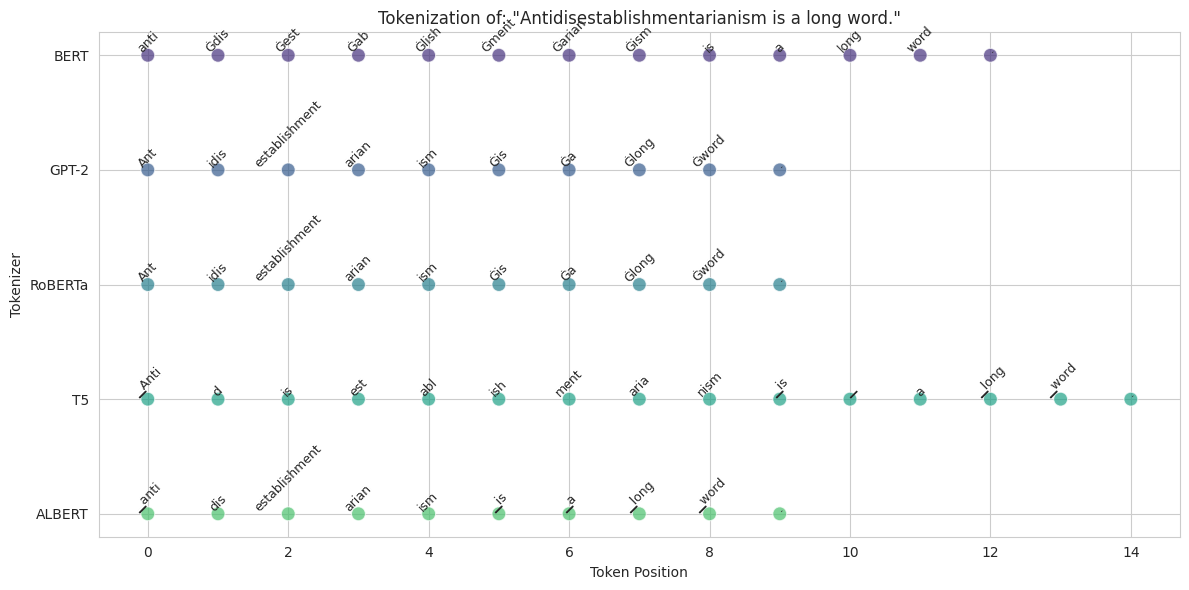


Example 2: The AI2023 conference had 5,000 participants.
BERT    : 11 tokens - the | ai | Ġ20 | Ġ23 | conference | had | 5 | , | 000 | participants | .
GPT-2   : 11 tokens - The | ĠAI | 20 | 23 | Ġconference | Ġhad | Ġ5 | , | 000 | Ġparticipants | .
RoBERTa : 11 tokens - The | ĠAI | 20 | 23 | Ġconference | Ġhad | Ġ5 | , | 000 | Ġparticipants | .
T5      : 10 tokens - ▁The | ▁AI | 20 | 23 | ▁conference | ▁had | ▁ | 5,000 | ▁participants | .
ALBERT  : 10 tokens - ▁the | ▁a | i | 20 | 23 | ▁conference | ▁had | ▁5,000 | ▁participants | .


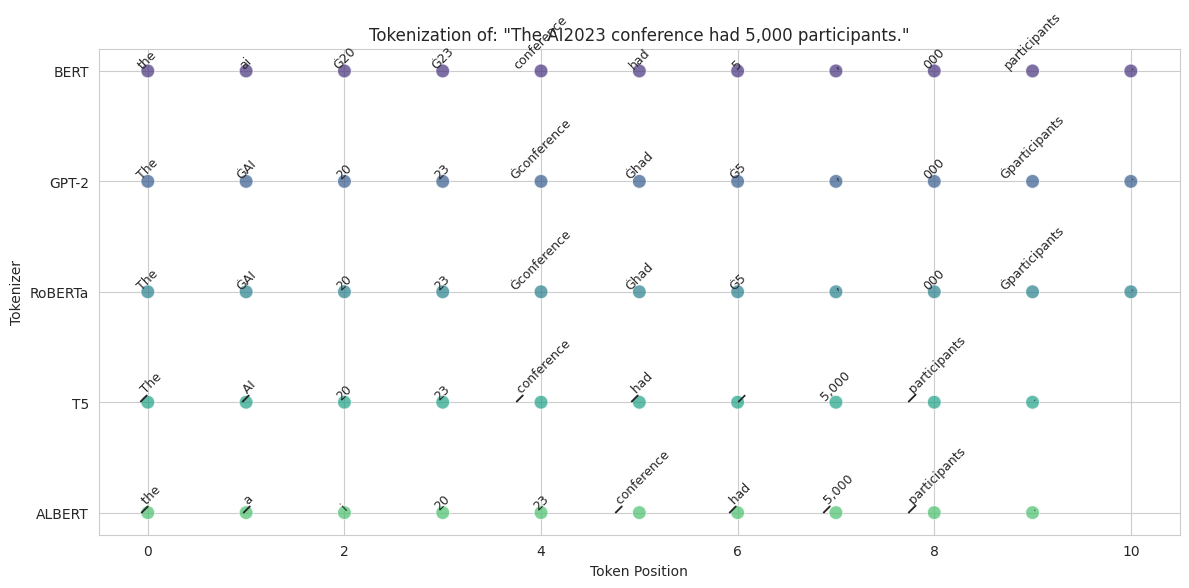


Example 3: She pre-ordered the iPhone 14 Pro Max.
BERT    : 10 tokens - she | pre | - | ordered | the | iphone | 14 | pro | max | .
GPT-2   : 10 tokens - She | Ġpre | - | ordered | Ġthe | ĠiPhone | Ġ14 | ĠPro | ĠMax | .
RoBERTa : 10 tokens - She | Ġpre | - | ordered | Ġthe | ĠiPhone | Ġ14 | ĠPro | ĠMax | .
T5      : 12 tokens - ▁She | ▁pre | - | order | e | d | ▁the | ▁iPhone | ▁14 | ▁Pro | ▁Max | .
ALBERT  : 11 tokens - ▁she | ▁pre | - | order | ed | ▁the | ▁iphone | ▁14 | ▁pro | ▁max | .


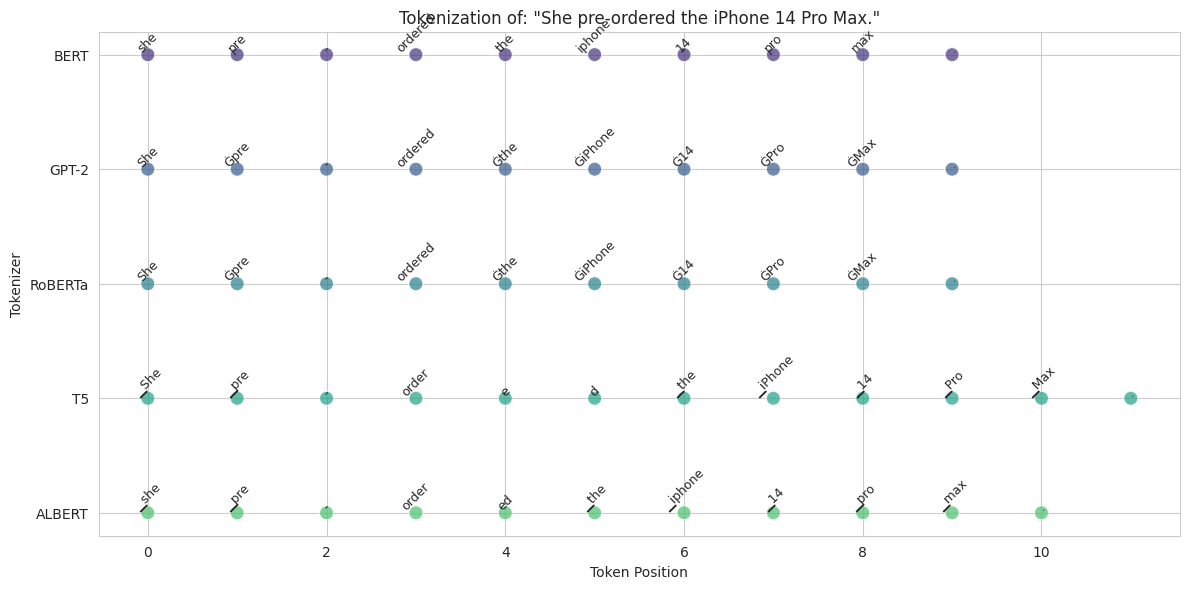


Analyzing tokenization of rare word: 'nanobiotechnology'
BERT    : ['nano', 'Ġbio', 'Ġtech', 'Ġnology'] (4 subwords)
GPT-2   : ['nan', 'obi', 'otechnology'] (3 subwords)
RoBERTa : ['nan', 'obi', 'otechnology'] (3 subwords)
T5      : ['▁nano', 'bio', 'technology'] (3 subwords)
ALBERT  : ['▁nano', 'bio', 'technology'] (3 subwords)

Analyzing tokenization of rare word: 'electroencephalogram'
BERT    : ['electro', 'Ġence', 'Ġpha', 'Ġlogram'] (4 subwords)
GPT-2   : ['elect', 'ro', 'ence', 'ph', 'alog', 'ram'] (6 subwords)
RoBERTa : ['elect', 'ro', 'ence', 'ph', 'alog', 'ram'] (6 subwords)
T5      : ['▁electro', 'ence', 'phal', 'ogram'] (4 subwords)
ALBERT  : ['▁electro', 'en', 'cephal', 'ogram'] (4 subwords)

Analyzing tokenization of rare word: 'pneumonoultramicroscopicsilicovolcanoconiosis'
BERT    : ['p', 'Ġne', 'Ġum', 'Ġono', 'Ġult', 'Ġram', 'Ġic', 'Ġros', 'Ġcopic', 'Ġsil', 'Ġico', 'Ġvo', 'Ġlc', 'Ġano', 'Ġcon', 'Ġios', 'Ġis'] (17 subwords)
GPT-2   : ['p', 'neum', 'on', 'oult', 'ram', '

In [36]:
from transformers import AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load different tokenizers
tokenizers = {
    "BERT": AutoTokenizer.from_pretrained("bert-base-uncased"),
    "GPT-2": AutoTokenizer.from_pretrained("gpt2"),
    "RoBERTa": AutoTokenizer.from_pretrained("roberta-base"),
    "T5": AutoTokenizer.from_pretrained("t5-base"),
    "ALBERT": AutoTokenizer.from_pretrained("albert-base-v2")
}

# Example texts with various challenging aspects
texts = [
    "Antidisestablishmentarianism is a long word.",  # Very long word
    "The AI2023 conference had 5,000 participants.",  # Numbers and mixed content
    "She pre-ordered the iPhone 14 Pro Max.",  # Hyphenation and product names
    "The URL is https://www.example.com/api?query=test.",  # URLs
    "COVID-19 has affected global healthcare systems.",  # Acronyms with numbers
    "Neural networks use backpropagation algorithm.",  # Technical terms
    "I love 💻 and using 🚀 in my messages!",  # Emojis
    "She speaks English, Spanish, and un peu de français."  # Multilingual
]

# Function to compare tokenization across different models
def compare_tokenization(text):
    results = {}

    for name, tokenizer in tokenizers.items():
        tokens = tokenizer.tokenize(text)
        # Clean up special tokens for display
        if name == "BERT" or name == "ALBERT":
            tokens = [t.replace("##", "Ġ") for t in tokens]  # Convert BERT style to match others
        results[name] = tokens

    return results

# Create a function to visualize tokenization
def visualize_tokenization(text, tokenization_results):
    # Create a DataFrame for easier visualization
    rows = []

    for model, tokens in tokenization_results.items():
        for i, token in enumerate(tokens):
            rows.append({
                'Model': model,
                'Position': i,
                'Token': token
            })

    df = pd.DataFrame(rows)

    # Generate the visualization
    plt.figure(figsize=(12, len(tokenization_results) * 1.2))

    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    chart = sns.scatterplot(
        data=df,
        y='Model',
        x='Position',
        hue='Model',
        s=100,
        alpha=0.7
    )

    # Add token labels
    for _, row in df.iterrows():
        plt.text(
            row['Position'],
            row['Model'],
            row['Token'],
            ha='center',
            va='bottom',
            rotation=45,
            fontsize=9
        )

    plt.title(f'Tokenization of: "{text}"', fontsize=12)
    plt.xlabel('Token Position')
    plt.ylabel('Tokenizer')
    plt.tight_layout()

    # Remove legend as it's redundant with y-axis
    plt.legend([],[], frameon=False)

    return plt

# Analyze a few example texts
for i, text in enumerate(texts[:3]):  # Limit to first 3 for brevity
    print(f"\nExample {i+1}: {text}")
    results = compare_tokenization(text)

    # Display token counts
    for model, tokens in results.items():
        token_display = " | ".join(tokens)
        print(f"{model:<8}: {len(tokens)} tokens - {token_display}")

    # Generate visualization
    plt_obj = visualize_tokenization(text, results)
    plt_obj.show()

# Function to analyze how rare words are tokenized
def analyze_rare_word(word):
    print(f"\nAnalyzing tokenization of rare word: '{word}'")
    results = {}

    for name, tokenizer in tokenizers.items():
        tokens = tokenizer.tokenize(word)
        if name == "BERT" or name == "ALBERT":
            tokens = [t.replace("##", "Ġ") for t in tokens]
        results[name] = tokens
        print(f"{name:<8}: {tokens} ({len(tokens)} subwords)")

    return results

# Analyze some rare or complex words
rare_words = [
    "nanobiotechnology",
    "electroencephalogram",
    "pneumonoultramicroscopicsilicovolcanoconiosis",
    "unsupervised"
]

for word in rare_words:
    analyze_rare_word(word)

# Demonstration of how subword tokenization handles out-of-vocabulary words
def test_oov_handling():
    print("\nTesting Out-of-Vocabulary (OOV) Handling")

    # Words likely not in training data
    oov_words = [
        "COVID19vaccine",  # Compound of recent terms
        "hyperparametrization",  # Technical ML term
        "neuromorphic",  # Scientific term
        "Pygame",  # Software library
        "cryptocurrency"  # Modern financial term
    ]

    for word in oov_words:
        print(f"\nOOV word: '{word}'")

        for name, tokenizer in tokenizers.items():
            tokens = tokenizer.tokenize(word)
            if name == "BERT" or name == "ALBERT":
                clean_tokens = [t.replace("##", "") for t in tokens]
                reconstructed = "".join(clean_tokens)
            else:
                clean_tokens = [t.replace("Ġ", "") for t in tokens]
                reconstructed = "".join(clean_tokens)

            print(f"{name:<8}: {tokens} → {''.join(reconstructed)}")

test_oov_handling()

# Measure vocabulary efficiency
def vocabulary_stats():
    print("\nVocabulary Size and Efficiency Metrics:")

    stats = []
    for name, tokenizer in tokenizers.items():
        vocab_size = tokenizer.vocab_size
        stats.append({
            'Tokenizer': name,
            'Vocabulary Size': vocab_size
        })

    # Print in table format
    df = pd.DataFrame(stats)
    print(df.to_string(index=False))

vocabulary_stats()



# Subword Tokenization

In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

In [5]:
import os
import re
import pandas as pd
from pathlib import Path
from tokenizers import Tokenizer, normalizers
from tokenizers.models import WordPiece
from tokenizers.trainers import WordPieceTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.processors import TemplateProcessing
from tokenizers.normalizers import NFD, Lowercase, StripAccents
from datasets import load_dataset


In [6]:

# 1. Prepare the training data
def prepare_training_data(output_file='training_corpus.txt'):
    """Download and prepare text data for tokenizer training"""
    # Load a dataset from Hugging Face
    print("Loading dataset...")
    dataset = load_dataset("wikitext", "wikitext-103-v1", split="train")

    # Write text samples to a single file
    print("Writing corpus to file...")
    with open(output_file, 'w', encoding='utf-8') as f:
        for item in dataset:
            if item['text'].strip():  # Skip empty lines
                f.write(item['text'].strip() + '\n')

    print(f"Training corpus saved to {output_file}")
    return output_file

In [7]:
# 2. Build and train a custom WordPiece tokenizer
def build_wordpiece_tokenizer(corpus_file, vocab_size=25000, min_frequency=2):
    """Build and train a custom WordPiece tokenizer"""
    print(f"Building WordPiece tokenizer with vocab size {vocab_size}...")

    # Initialize the tokenizer with WordPiece model
    tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))

    # Add preprocessing: normalize text before tokenization
    tokenizer.normalizer = normalizers.Sequence([
        NFD(),                   # Unicode normalization
        Lowercase(),             # Convert to lowercase
        StripAccents()           # Remove accents
    ])

    # Set the pre-tokenizer to split on whitespace
    tokenizer.pre_tokenizer = Whitespace()

    # Setup the trainer
    trainer = WordPieceTrainer(
        vocab_size=vocab_size,
        special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
        min_frequency=min_frequency
    )

    # Train the tokenizer
    print("Training tokenizer...")
    tokenizer.train(files=[corpus_file], trainer=trainer)

    # Add post-processing to handle special tokens
    tokenizer.post_processor = TemplateProcessing(
        single="[CLS] $A [SEP]",
        pair="[CLS] $A [SEP] $B [SEP]",
        special_tokens=[
            ("[CLS]", tokenizer.token_to_id("[CLS]")),
            ("[SEP]", tokenizer.token_to_id("[SEP]")),
        ],
    )

    print("Tokenizer training complete!")
    return tokenizer

In [8]:
# 3. Save and load the tokenizer
def save_tokenizer(tokenizer, output_dir='./custom_tokenizer'):
    """Save the tokenizer to files"""
    Path(output_dir).mkdir(exist_ok=True, parents=True)
    tokenizer_path = os.path.join(output_dir, "wordpiece_tokenizer.json")

    print(f"Saving tokenizer to {tokenizer_path}")
    tokenizer.save(tokenizer_path)

    # Also save the vocabulary for inspection
    vocab_path = os.path.join(output_dir, "vocab.txt")
    with open(vocab_path, 'w', encoding='utf-8') as f:
        for token, id in sorted(tokenizer.get_vocab().items(), key=lambda x: x[1]):
            f.write(f"{token}\n")

    print(f"Vocabulary saved to {vocab_path}")
    return tokenizer_path

In [9]:
def load_tokenizer(tokenizer_path):
    """Load a trained tokenizer from file"""
    print(f"Loading tokenizer from {tokenizer_path}")
    return Tokenizer.from_file(tokenizer_path)

In [10]:
# 4. Analyze subword tokenization
def analyze_tokenization(tokenizer, texts):
    """Analyze how the tokenizer breaks down different texts"""
    results = []

    for text in texts:
        # Tokenize the text
        encoding = tokenizer.encode(text)
        tokens = encoding.tokens

        # Calculate statistics
        char_count = len(text)
        token_count = len(tokens)
        compression_ratio = char_count / token_count

        # Store results
        results.append({
            'Text': text,
            'Original Length': char_count,
            'Token Count': token_count,
            'Tokens': tokens,
            'Compression Ratio': compression_ratio
        })

    # Convert to DataFrame for easier analysis
    return pd.DataFrame(results)

In [11]:
# 5. Compare with other tokenizers
def compare_with_standard_tokenizers(texts):
    """Compare custom tokenizer with standard ones from Hugging Face"""
    from transformers import AutoTokenizer

    # Load standard tokenizers
    standard_tokenizers = {
        'BERT': AutoTokenizer.from_pretrained('bert-base-uncased'),
        'RoBERTa': AutoTokenizer.from_pretrained('roberta-base'),
        'GPT-2': AutoTokenizer.from_pretrained('gpt2')
    }

    all_results = {}

    # Process each text with each tokenizer
    for text in texts:
        text_results = {}

        for name, tokenizer in standard_tokenizers.items():
            tokens = tokenizer.tokenize(text)
            text_results[name] = {
                'Tokens': tokens,
                'Token Count': len(tokens)
            }

        all_results[text] = text_results

    return all_results

In [12]:

# 6. Main execution function
def main():
    # Set of example texts for analysis
    analysis_texts = [
        "The quick brown fox jumps over the lazy dog.",
        "Subword tokenization helps models understand morphology better.",
        "Pneumonoultramicroscopicsilicovolcanoconiosis is a very long word.",
        "In 2023, large language models became increasingly popular.",
        "She pre-ordered the latest smartphone for $999.99.",
        "The URL is https://www.example.com/api?query=test.",
        "This text contains some unusual words like hyperboloid and electroencephalogram."
    ]

    # 1. Prepare data (comment out if already downloaded)
    corpus_file = prepare_training_data()

    # 2. Build tokenizer
    tokenizer = build_wordpiece_tokenizer(corpus_file, vocab_size=25000)

    # 3. Save tokenizer
    tokenizer_path = save_tokenizer(tokenizer)

    # 4. Analyze our custom tokenizer
    print("\n=== Custom Tokenizer Analysis ===")
    analysis_df = analyze_tokenization(tokenizer, analysis_texts)

    # Display results
    pd.set_option('display.max_colwidth', None)
    for _, row in analysis_df.iterrows():
        print(f"\nText: {row['Text']}")
        print(f"Token count: {row['Token Count']}")
        print(f"Tokens: {row['Tokens']}")
        print(f"Compression ratio: {row['Compression Ratio']:.2f}")

    # 5. Compare with standard tokenizers
    print("\n=== Comparing with Standard Tokenizers ===")
    comparison = compare_with_standard_tokenizers(analysis_texts[:3])  # First 3 for brevity

    for text, results in comparison.items():
        print(f"\nText: {text}")
        for tokenizer_name, data in results.items():
            print(f"  {tokenizer_name}: {data['Token Count']} tokens")
            print(f"    {data['Tokens']}")

    # 6. Test on completely new words
    print("\n=== Testing on New/Rare Words ===")
    new_words = [
        "bioelectromagnetism",
        "cryptocurrency",
        "nanobiotechnology",
        "hyperparametrization",
        "metaversification"
    ]

    for word in new_words:
        encoding = tokenizer.encode(word)
        print(f"'{word}' → {encoding.tokens}")

In [13]:

if __name__ == "__main__":
    main()

Loading dataset...


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/722k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/655k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Writing corpus to file...
Training corpus saved to training_corpus.txt
Building WordPiece tokenizer with vocab size 25000...
Training tokenizer...
Tokenizer training complete!
Saving tokenizer to ./custom_tokenizer/wordpiece_tokenizer.json
Vocabulary saved to ./custom_tokenizer/vocab.txt

=== Custom Tokenizer Analysis ===

Text: The quick brown fox jumps over the lazy dog.
Token count: 12
Tokens: ['[CLS]', 'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', '[SEP]']
Compression ratio: 3.67

Text: Subword tokenization helps models understand morphology better.
Token count: 15
Tokens: ['[CLS]', 'sub', '##word', 'tok', '##eni', '##za', '##ti', '##on', 'helps', 'models', 'understand', 'morphology', 'better', '.', '[SEP]']
Compression ratio: 4.20

Text: Pneumonoultramicroscopicsilicovolcanoconiosis is a very long word.
Token count: 22
Tokens: ['[CLS]', 'pneum', '##on', '##oul', '##tra', '##mic', '##roscopic', '##si', '##li', '##co', '##vol', '##can', '##oco', '##ni',

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Text: The quick brown fox jumps over the lazy dog.
  BERT: 10 tokens
    ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
  RoBERTa: 10 tokens
    ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
  GPT-2: 10 tokens
    ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']

Text: Subword tokenization helps models understand morphology better.
  BERT: 10 tokens
    ['sub', '##word', 'token', '##ization', 'helps', 'models', 'understand', 'morphology', 'better', '.']
  RoBERTa: 10 tokens
    ['Sub', 'word', 'Ġtoken', 'ization', 'Ġhelps', 'Ġmodels', 'Ġunderstand', 'Ġmorphology', 'Ġbetter', '.']
  GPT-2: 10 tokens
    ['Sub', 'word', 'Ġtoken', 'ization', 'Ġhelps', 'Ġmodels', 'Ġunderstand', 'Ġmorphology', 'Ġbetter', '.']

Text: Pneumonoultramicroscopicsilicovolcanoconiosis is a very long word.
  BERT: 23 tokens
    ['p', '##ne', '##um', '##ono', '##ult', '##ram', '##ic', '##ros', '##copic', '##sil'